In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [17]:
# Load the CSV file
csv_file = "data\hand_gesture_landmarks(1).csv"
data = pd.read_csv(csv_file)

In [18]:
# Separate features (X) and target variable (y)
X = data.iloc[:, :-1]
y = data['class']

In [19]:
# Use LabelEncoder to encode non-numeric class labels into integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Save the label encoder for later use
label_encoder_filename = "model\label_encoder.joblib"
joblib.dump(label_encoder, label_encoder_filename)
print(f"Label Encoder saved to {label_encoder_filename}")

Label Encoder saved to model\label_encoder.joblib


In [20]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
def heatmap_confusion_matrix(y_test, y_pred):
    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plot it
    plt.figure(figsize=(12, 8))
    # xticklabels are the labels of the confusion matrix with some angle
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.title('Confusion matrix')
    plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.2f}")

# Display classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

# Save the trained model to a file
model_filename = "model\hgmodel_RandomForest.joblib"
joblib.dump(clf, model_filename)
print(f"Model saved to {model_filename}")

Accuracy: 0.97
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        23
           2       1.00      0.91      0.95        22
           3       0.96      0.96      0.96        24
           4       0.96      1.00      0.98        23
           5       0.96      1.00      0.98        22
           6       0.91      1.00      0.95        20
           7       1.00      0.85      0.92        13

    accuracy                           0.97       160
   macro avg       0.97      0.96      0.97       160
weighted avg       0.97      0.97      0.97       160

Model saved to model\hgmodel_RandomForest.joblib


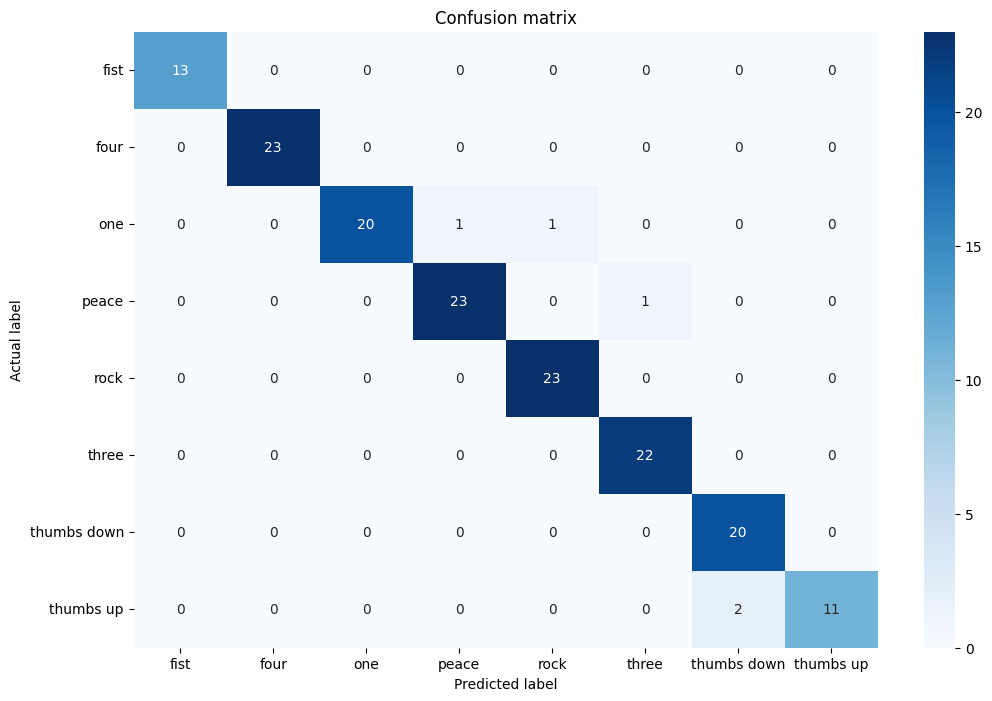

In [23]:
heatmap_confusion_matrix(y_test, y_pred)

In [24]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', C=1)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machine Classifier Accuracy: {accuracy_svm:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

file="model\hgmodel_SVM.joblib"
joblib.dump(svm_classifier, file)
print(f"Model saved to {file}")

Support Vector Machine Classifier Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        23
           2       1.00      0.95      0.98        22
           3       0.92      0.96      0.94        24
           4       1.00      1.00      1.00        23
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      0.92      0.96        13

    accuracy                           0.98       160
   macro avg       0.98      0.98      0.98       160
weighted avg       0.98      0.98      0.98       160

Model saved to model\hgmodel_SVM.joblib


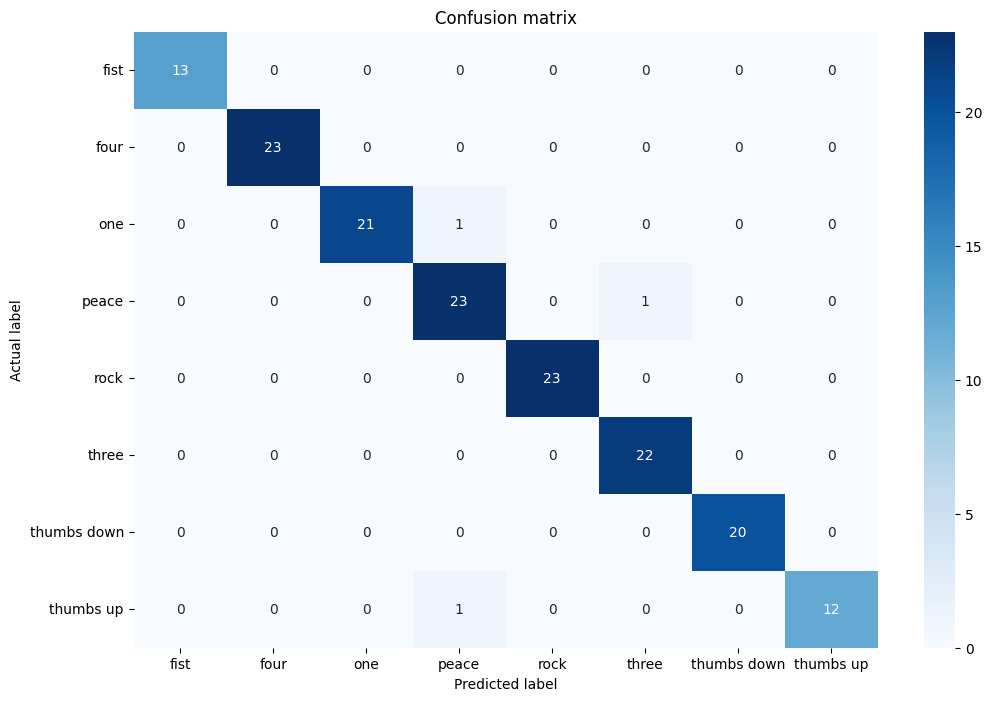

In [25]:
heatmap_confusion_matrix(y_test, y_pred_svm)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Classifier Accuracy: {accuracy_knn:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

file="model\hgmodel_KNN.joblib"
joblib.dump(knn_classifier, file)
print(f"Model saved to {file}")

K-Nearest Neighbors Classifier Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.98        22
           3       0.96      1.00      0.98        24
           4       1.00      1.00      1.00        23
           5       1.00      0.95      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        13

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160

Model saved to model\hgmodel_KNN.joblib


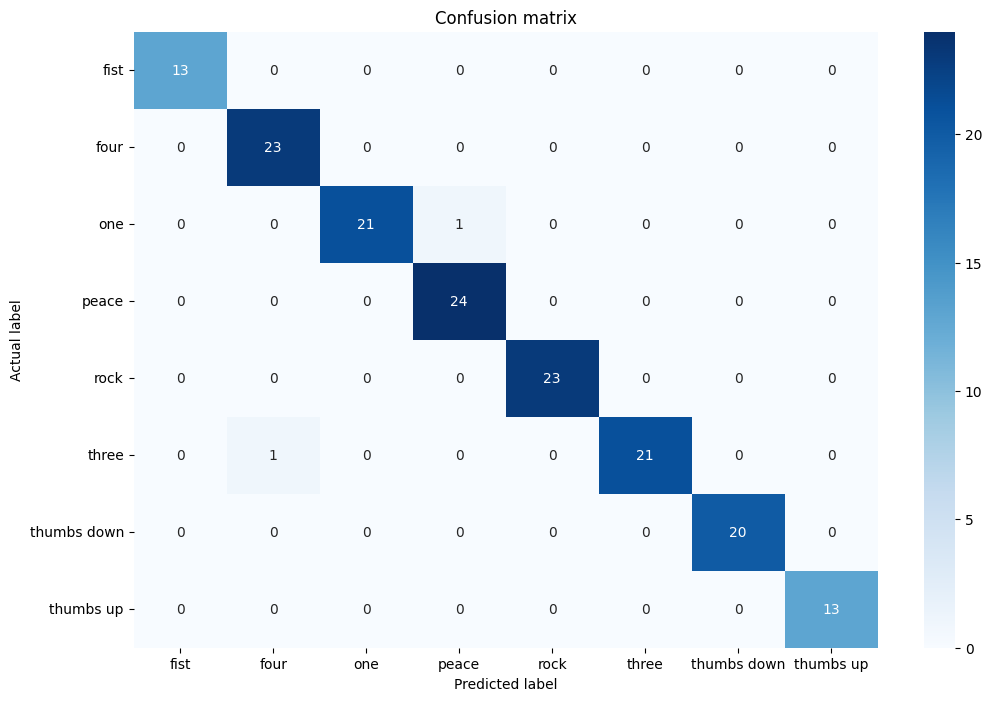

In [27]:
heatmap_confusion_matrix(y_test, y_pred_knn)

In [28]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import StandardScaler

# # Standardize features by removing the mean and scaling to unit variance
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Initialize the Multi-layer Perceptron (Neural Network) Classifier
# mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# # Train the model
# mlp_classifier.fit(X_train_scaled, y_train)

# # Make predictions on the test set
# y_pred_mlp = mlp_classifier.predict(X_test_scaled)

# # Evaluate the model
# accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
# print(f"Neural Network Classifier Accuracy: {accuracy_mlp:.2f}")
# print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

# file="model\hgmodel_MLP.joblib"
# joblib.dump(mlp_classifier, file)
# print(f"Model saved to {file}")

In [29]:
# heatmap_confusion_matrix(y_test, y_pred_mlp)

In [30]:
# StandardScalerfile="model\standard_scaler.joblib"
# joblib.dump(scaler, StandardScalerfile)
# print(f"standard_scaler saved to {StandardScalerfile}")

NameError: name 'scaler' is not defined

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_classifier.fit(X_train, y_train)

y_pred_gb = gb_classifier.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

file="model\hgmodel_GB.joblib"
joblib.dump(gb_classifier, file)
print(f"Model saved to {file}")

Gradient Boosting Classifier Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        23
           2       1.00      0.95      0.98        22
           3       1.00      0.96      0.98        24
           4       0.96      1.00      0.98        23
           5       0.96      1.00      0.98        22
           6       0.91      1.00      0.95        20
           7       1.00      0.85      0.92        13

    accuracy                           0.97       160
   macro avg       0.98      0.97      0.97       160
weighted avg       0.98      0.97      0.97       160

Model saved to model\hgmodel_GB.joblib


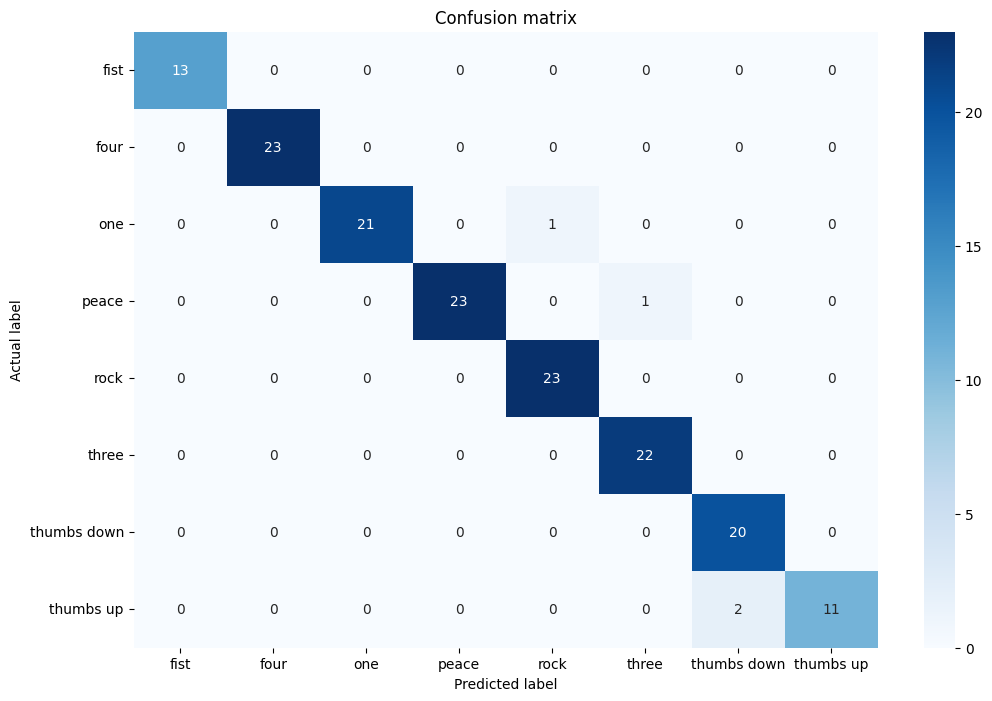

In [33]:
heatmap_confusion_matrix(y_test, y_pred_gb)

In [ ]:
!pip install xgboost

  Using cached xgboost-2.0.2-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.3 MB/s eta 0:01:16
   ---------------------------------------- 0.2/99.8 MB 1.9 MB/s eta 0:00:53
   ---------------------------------------- 0.4/99.8 MB 2.1 MB/s eta 0:00:48
   ---------------------------------------- 0.6/99.8 MB 2.8 MB/s eta 0:00:36
   ---------------------------------------- 1.0/99.8 MB 3.9 MB/s eta 0:00:26
    --------------------------------------- 1.7/99.8 MB 5.1 MB/s eta 0:00:20
    --------------------------------------- 2.3/99.8 MB 6.2 MB/s eta 0:00:16
   - -------------------------------------- 3.0/99.8 MB 7.5 MB/s eta 0:00:13
   - -------------------------------------- 3.8/99.8 MB 8.3 MB/s eta 0:00:12
   - -------------------------------------- 4.7/99.8 MB 9.4 MB/s eta 0:00:11
   -- --------------

In [34]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',  
    'num_class': len(set(y_train)),
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'merror'  
}

num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

y_pred_xgb = xgb_model.predict(dtest)
y_pred_xgb = y_pred_xgb.astype(int)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

file="model\hgmodel_xbg.joblib"
joblib.dump(xgb_model, file)
print(f"Model saved to {file}")

XGBoost Classifier Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        22
           3       1.00      0.96      0.98        24
           4       1.00      1.00      1.00        23
           5       0.96      1.00      0.98        22
           6       0.95      1.00      0.98        20
           7       1.00      0.92      0.96        13

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160

Model saved to model\hgmodel_xbg.joblib


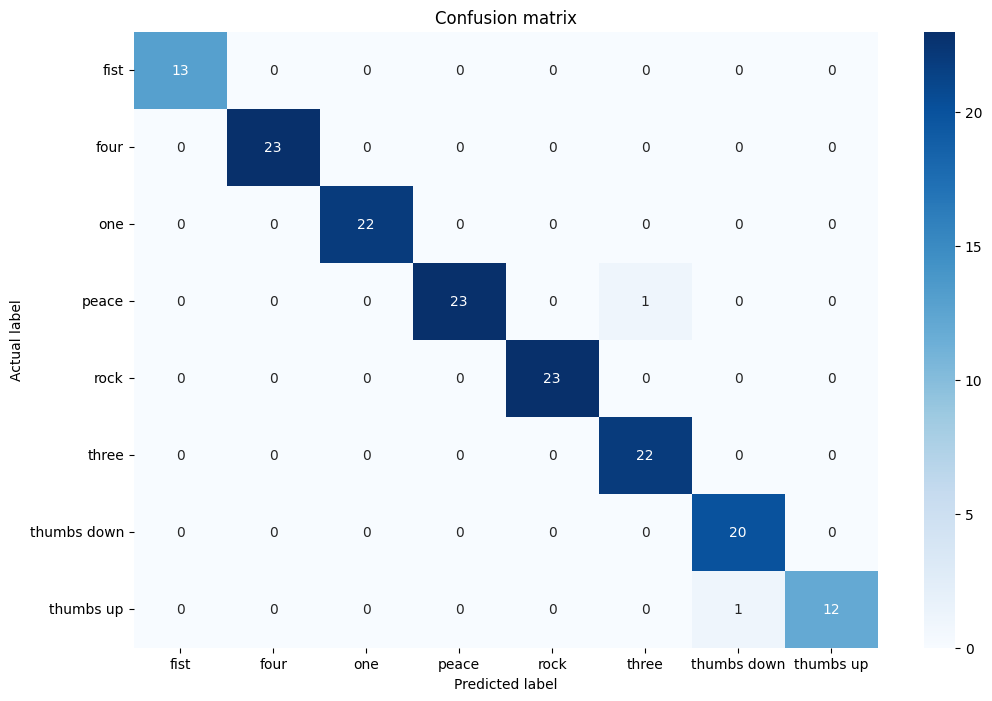

In [35]:
heatmap_confusion_matrix(y_test, y_pred_xgb)

In [36]:
# models = pd.DataFrame({
#     'Model': ['Random Forest', 'Support Vector Machine', 'KNN', 'Neural Network', 'Gradient Boosting', 'XGBoost'],
#     'Accuracy': [accuracy_rf, accuracy_svm, accuracy_knn, accuracy_mlp, accuracy_gb, accuracy_xgb]
# })

models = pd.DataFrame({
    'Model': ['Random Forest', 'Support Vector Machine', 'KNN', 'Gradient Boosting', 'XGBoost'],
    'Accuracy': [accuracy_rf, accuracy_svm, accuracy_knn, accuracy_gb, accuracy_xgb]
})

models.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
2,KNN,0.98750
4,XGBoost,0.98750
1,Support Vector Machine,0.98125
3,Gradient Boosting,0.97500
0,Random Forest,0.96875


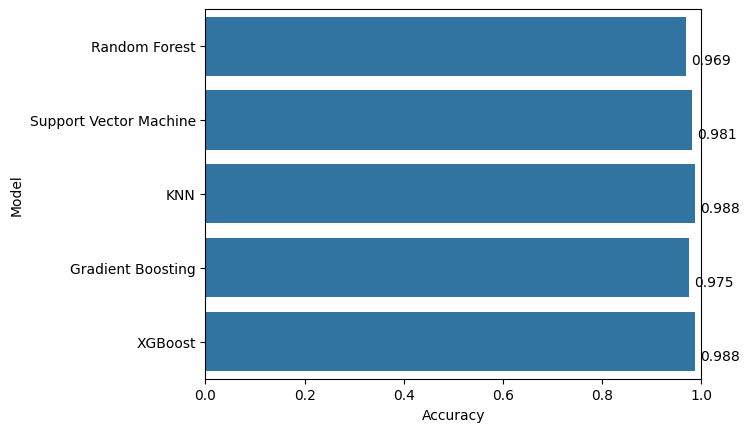

In [49]:
ar = sns.barplot(x='Accuracy', y='Model', data=models)
ar.set_xlabel("Accuracy")
ar.set_ylabel("Model")
ar.set_xlim(0, 1)
for i, v in enumerate(models['Accuracy']):
    ar.text(v + 0.01, i + .25, str(round(v, 3)), color='black')
plt.show()